Copyright 2019 Almintas Povilaitis

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

<table class="tfo-notebook-buttons" align="left">
<td>
<a target="_blank"  href="https://colab.research.google.com/github/mlai-demo/TextExplore/blob/master/RePlutarch_ExplorePub.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/mlai-demo/TextExplore/blob/master/RePlutarch_ExplorePub.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

## Pre-processing

### Download the libraries and dataset

Check the current directory and upload the text file:

In [1]:
import os
fpath = os.getcwd(); fpath

'/content'

In [2]:
# use for file uploading into Google Colab Files folder
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Click the Files tab on the left - the uploaded file(s) will be there

Saving Plutarch.txt to Plutarch.txt
User uploaded file "Plutarch.txt" with length 4302609 bytes


In [3]:
book = open(fpath + '/Plutarch.txt', 'rb').read().decode(encoding='utf-8')
words = [w for w in book.split(' ') if w.strip() != '' or w == '\n']
print("The text is {} words long".format(len(words)))

The text is 674051 words long


### Explore the text
Tokenize, convert to lower case, remove stop words and some punctuation, then save the new text for future reference:

In [4]:
# Check the English stop words in case need to enhance the list
import nltk
nltk.download('stopwords') #need if using Google Colab
from nltk.corpus import stopwords
print (stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


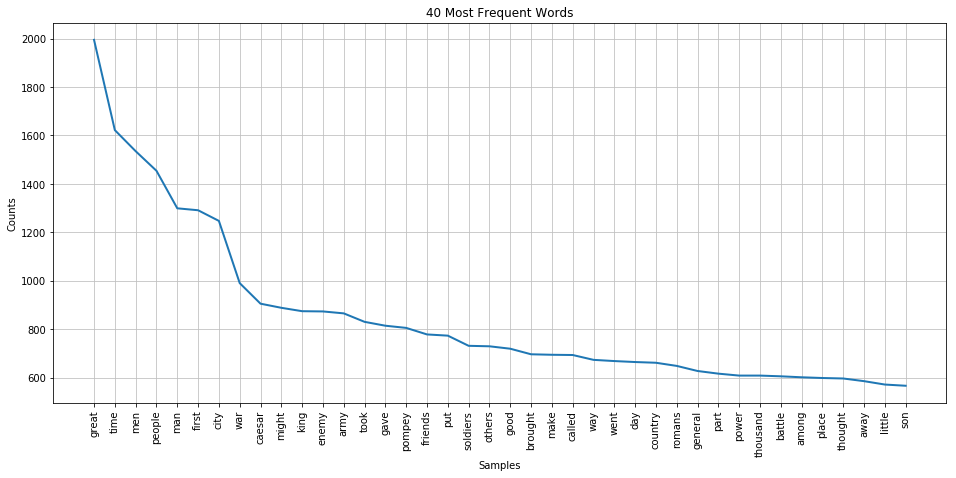

In [5]:
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt') #need if using Google Colab
import matplotlib.pyplot as plt
%matplotlib inline

with open(fpath + '/Plutarch.txt') as f, open(fpath + '/Plutarch_tokens.txt', 'w') as out_f:
    text = f.read()
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = stopwords.words('english')
    new_stop_words = ['one','came', 'come', 'upon', 'made','though', 'indeed', 'left', 'yet', 'without'
                 'thus','therefore', 'another', 'much', 'many','said', 'either', 'two', 'upon', 'would',
                     'around', 'without', 'when', 'also', 'could', 'sent', 'notwithstanding', 'hence', 'thus']
    stop_words.extend(new_stop_words)
    words = [w for w in words if not w in stop_words]
    new_text = ' '.join(words)
    plt.figure(figsize=(16, 7))
    fd = nltk.FreqDist(words)
    fd.plot(40,title = "40 Most Frequent Words", cumulative=False)
    #print(new_text[:500]) uncomment if you want to print some text
    out_f.write(new_text)

In [6]:
fd.most_common(40)

[('great', 1995),
 ('time', 1622),
 ('men', 1535),
 ('people', 1454),
 ('man', 1299),
 ('first', 1291),
 ('city', 1247),
 ('war', 990),
 ('caesar', 905),
 ('might', 888),
 ('king', 874),
 ('enemy', 873),
 ('army', 865),
 ('took', 830),
 ('gave', 814),
 ('pompey', 805),
 ('friends', 778),
 ('put', 773),
 ('soldiers', 731),
 ('others', 729),
 ('good', 719),
 ('brought', 696),
 ('make', 694),
 ('called', 693),
 ('way', 673),
 ('went', 668),
 ('day', 664),
 ('country', 661),
 ('romans', 648),
 ('general', 627),
 ('part', 616),
 ('power', 608),
 ('thousand', 608),
 ('battle', 605),
 ('among', 601),
 ('place', 598),
 ('thought', 596),
 ('away', 585),
 ('little', 571),
 ('son', 566)]

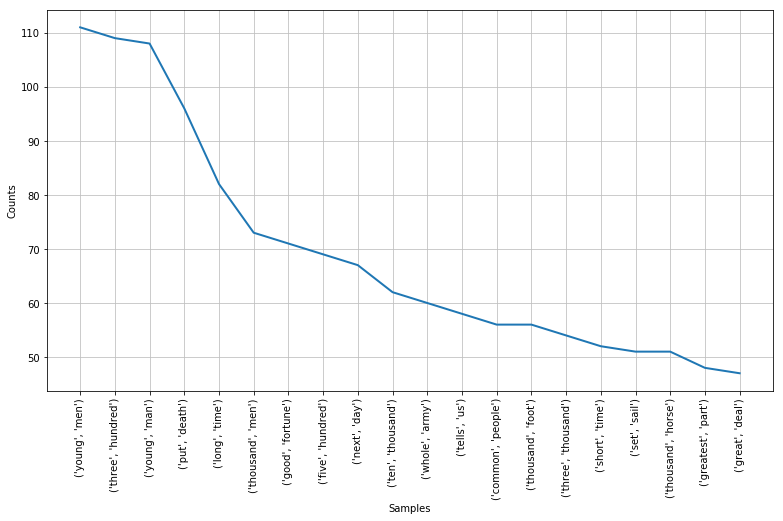

In [7]:
bigrams = nltk.bigrams(words)
freq_bigrams = nltk.FreqDist(bigrams)

plt.figure(figsize=(13, 7))
freq_bigrams.plot(20)

In [8]:
freq_bigrams.most_common(20)

[(('young', 'men'), 111),
 (('three', 'hundred'), 109),
 (('young', 'man'), 108),
 (('put', 'death'), 96),
 (('long', 'time'), 82),
 (('thousand', 'men'), 73),
 (('good', 'fortune'), 71),
 (('five', 'hundred'), 69),
 (('next', 'day'), 67),
 (('ten', 'thousand'), 62),
 (('whole', 'army'), 60),
 (('tells', 'us'), 58),
 (('common', 'people'), 56),
 (('thousand', 'foot'), 56),
 (('three', 'thousand'), 54),
 (('short', 'time'), 52),
 (('set', 'sail'), 51),
 (('thousand', 'horse'), 51),
 (('greatest', 'part'), 48),
 (('great', 'deal'), 47)]

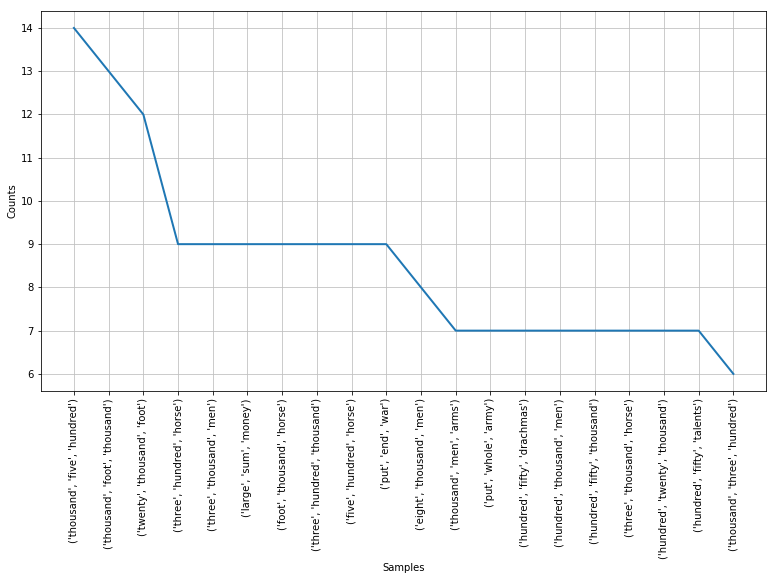

In [9]:
trigrams = nltk.trigrams(words)
freq_trigrams = nltk.FreqDist(trigrams)

plt.figure(figsize=(13, 7))
freq_trigrams.plot(20)

In [10]:
freq_trigrams.most_common(20)

[(('thousand', 'five', 'hundred'), 14),
 (('thousand', 'foot', 'thousand'), 13),
 (('twenty', 'thousand', 'foot'), 12),
 (('three', 'hundred', 'horse'), 9),
 (('three', 'thousand', 'men'), 9),
 (('large', 'sum', 'money'), 9),
 (('foot', 'thousand', 'horse'), 9),
 (('three', 'hundred', 'thousand'), 9),
 (('five', 'hundred', 'horse'), 9),
 (('put', 'end', 'war'), 9),
 (('eight', 'thousand', 'men'), 8),
 (('thousand', 'men', 'arms'), 7),
 (('put', 'whole', 'army'), 7),
 (('hundred', 'fifty', 'drachmas'), 7),
 (('hundred', 'thousand', 'men'), 7),
 (('hundred', 'fifty', 'thousand'), 7),
 (('three', 'thousand', 'horse'), 7),
 (('hundred', 'twenty', 'thousand'), 7),
 (('hundred', 'fifty', 'talents'), 7),
 (('thousand', 'three', 'hundred'), 6)]

In [11]:
unique = set(words)
print("The tokenized text is {} words long, has {} unique words and {} letters on average".format
      (len(words), len(unique), round(sum(len(word) for word in words)/len(words),2)))

The tokenized text is 316540 words long, has 20214 unique words and 6.48 letters on average


In [12]:
from nltk.stem.porter import PorterStemmer
with open(fpath + '/Plutarch_tokens.txt') as f, open(fpath + '/Plutarch_stem.txt', 'w') as out_f:
    text = f.read()
    tokens = word_tokenize(text)
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    print(stemmed[:100])
    new_stem_text = ' '.join(stemmed)
    fd_stemmed = nltk.FreqDist(stemmed)
    out_f.write(new_stem_text)

['theseu', 'geograph', 'sosiu', 'crowd', 'edg', 'map', 'part', 'world', 'know', 'ad', 'note', 'margin', 'effect', 'beyond', 'lie', 'noth', 'sandi', 'desert', 'full', 'wild', 'beast', 'unapproach', 'bog', 'scythian', 'ice', 'frozen', 'sea', 'work', 'mine', 'compar', 'live', 'greatest', 'men', 'pass', 'period', 'probabl', 'reason', 'reach', 'real', 'histori', 'find', 'foot', 'might', 'well', 'say', 'farther', 'beyond', 'noth', 'prodigi', 'fiction', 'inhabit', 'poet', 'inventor', 'fabl', 'credit', 'certainti', 'farther', 'publish', 'account', 'lycurgu', 'lawgiv', 'numa', 'king', 'thought', 'might', 'reason', 'ascend', 'high', 'romulu', 'brought', 'histori', 'near', 'time', 'consid', 'shall', 'set', 'great', 'man', 'face', 'oppos', 'equal', 'place', 'aeschylu', 'express', 'found', 'none', 'fit', 'peopl', 'beauti', 'farfam', 'citi', 'athen', 'set', 'opposit', 'father', 'invinc', 'renown', 'citi', 'rome', 'let']


In [13]:
unique_stemmed = set(stemmed)
print("The stemmed text is {} words long, has {} unique words and {} letters on average".format
      (len(stemmed), len(unique_stemmed), round(sum(len(word) for word in stemmed)/len(stemmed),2)))

The stemmed text is 316540 words long, has 12722 unique words and 5.49 letters on average


In [14]:
nltk.download('wordnet') #need if using Google Colab
from nltk.stem import WordNetLemmatizer

with open(fpath + '/Plutarch_tokens.txt') as f, open(fpath + '/Plutarch_lemma.txt', 'w') as out_f:
    text = f.read()
    tokens = word_tokenize(text)
    lemma = WordNetLemmatizer()
    lemmed = [lemma.lemmatize(word) for word in tokens]
    print(lemmed[:100])
    new_lem_text = ' '.join(lemmed)
    out_f.write(new_lem_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['theseus', 'geographer', 'sosius', 'crowd', 'edge', 'map', 'part', 'world', 'know', 'adding', 'note', 'margin', 'effect', 'beyond', 'lie', 'nothing', 'sandy', 'desert', 'full', 'wild', 'beast', 'unapproachable', 'bog', 'scythian', 'ice', 'frozen', 'sea', 'work', 'mine', 'compared', 'life', 'greatest', 'men', 'passing', 'period', 'probable', 'reasoning', 'reach', 'real', 'history', 'find', 'footing', 'might', 'well', 'say', 'farther', 'beyond', 'nothing', 'prodigy', 'fiction', 'inhabitant', 'poet', 'inventor', 'fable', 'credit', 'certainty', 'farther', 'publishing', 'account', 'lycurgus', 'lawgiver', 'numa', 'king', 'thought', 'might', 'reason', 'ascend', 'high', 'romulus', 'brought', 'history', 'near', 'time', 'considering', 'shall', 'set', 'great', 'man', 'face', 'oppose', 'equal', 'place', 'aeschylus', 'express', 'found', 'none', 'fit', 'peopled', 'beautiful', 'farfamed', 'city

In [15]:
unique_lemmed = set(lemmed)
print("The lemmatized text is {} words long, has {} unique words and {} letters on average".format
      (len(lemmed), len(unique_lemmed), round(sum(len(word) for word in lemmed)/len(lemmed),2)))

The lemmatized text is 316540 words long, has 17864 unique words and 6.34 letters on average


Unique words will help us determining the dictionary size in embeddings

Let's convert the into a word cloud! The wordcloud library has its own list of stop words, so we could inspect it - but here we'll be using the previously defined stop words (NLTK's stop words plus some additional ones indicated above); technically, the stop words are not even needed in this  case because the text files being used had already been cleaned.

In [0]:
#from wordcloud import STOPWORDS
#print(STOPWORDS)

# In case adding stop words is needed, it is as simple as:
#stopwords = set(STOPWORDS)
#stopwords.add("additional_stopword")

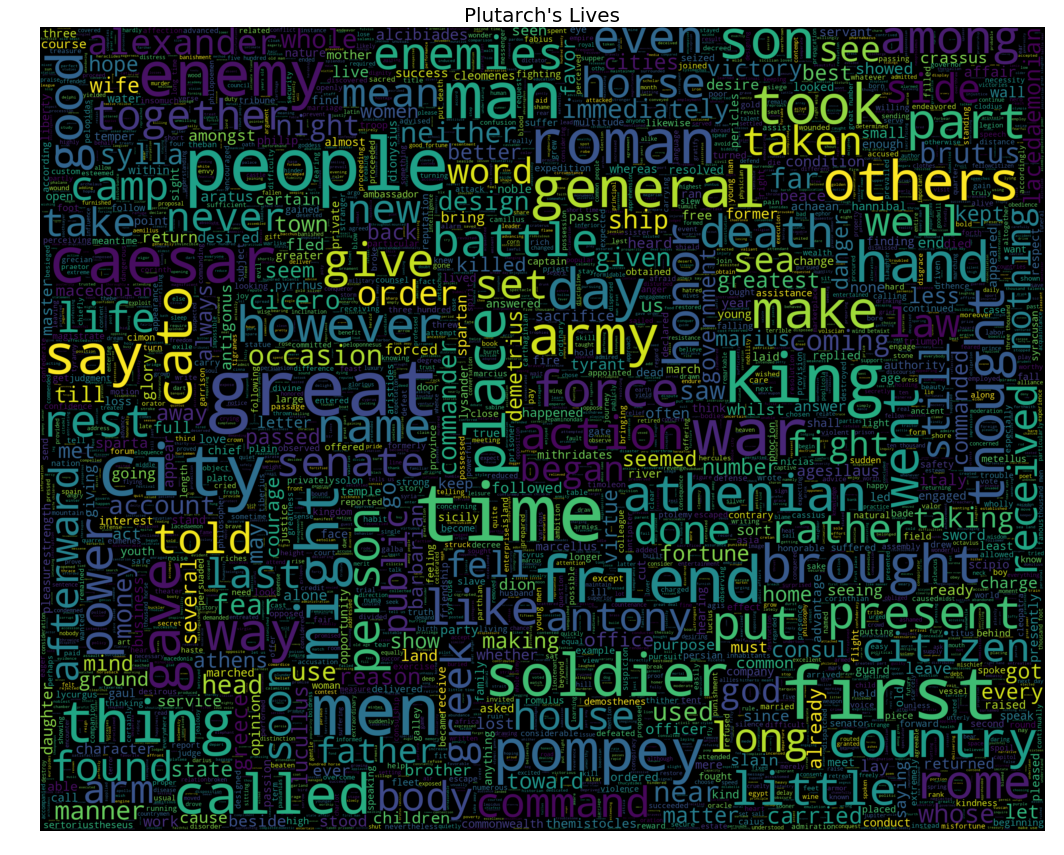

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
from os import path

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text_standard = open(fpath + '/Plutarch_tokens.txt', 'rt').read()

wc = WordCloud(stopwords=stop_words,
                      max_font_size=200,
                      width=2500,
                      height=2000,
                      max_words=4000,
                      random_state=44,
                     ).generate(text_standard)

wc.to_file(path.join(d, "wc.png")) #comment out if no need to store the png

fig = plt.figure().set_size_inches(18, 18)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Plutarch's Lives", fontsize= 20)
plt.show()

Now let's use the stemmed text and a more artistic way of creating the word cloud

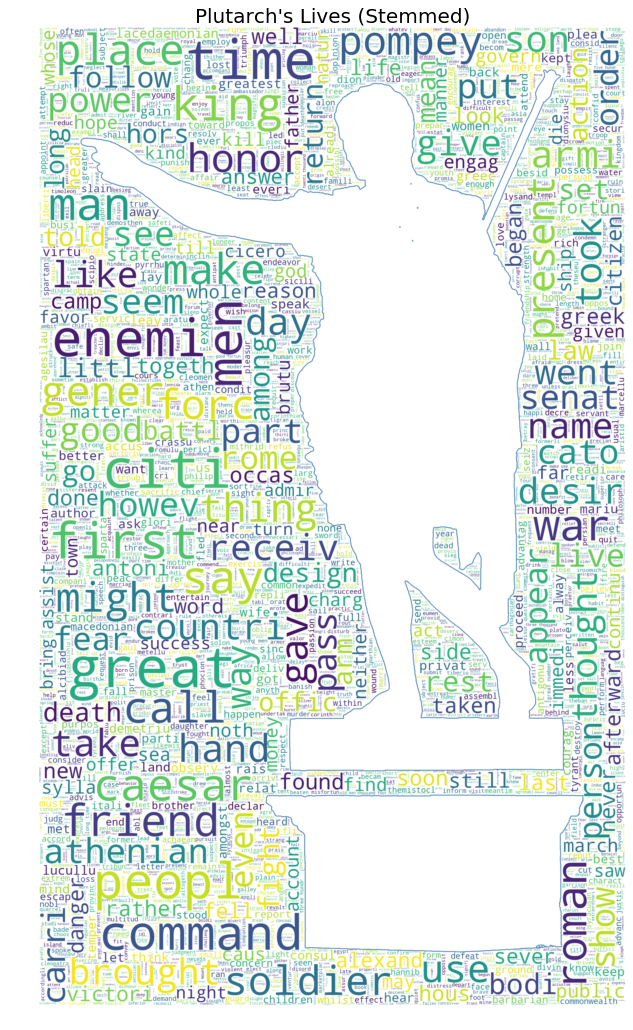

In [21]:
import numpy as np
from PIL import Image

roman_mask = np.array(Image.open(path.join(d, 'roman7.png')))
text_stem = open(fpath + '/Plutarch_stem.txt', 'rt').read()

wc = WordCloud(stopwords=stop_words, 
               max_font_size=200,
               width=5000,
               height=4000,
               background_color="white", 
               max_words=4000, 
               mask=roman_mask,
               contour_width=3, 
               contour_color='steelblue',
               random_state = 64).generate(text_stem)

wc.to_file(path.join(d, "wc_stemmed.png")) #comment out if no need to store the png

fig = plt.figure().set_size_inches(18, 18)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Plutarch's Lives (Stemmed)", fontsize= 20)
plt.show()

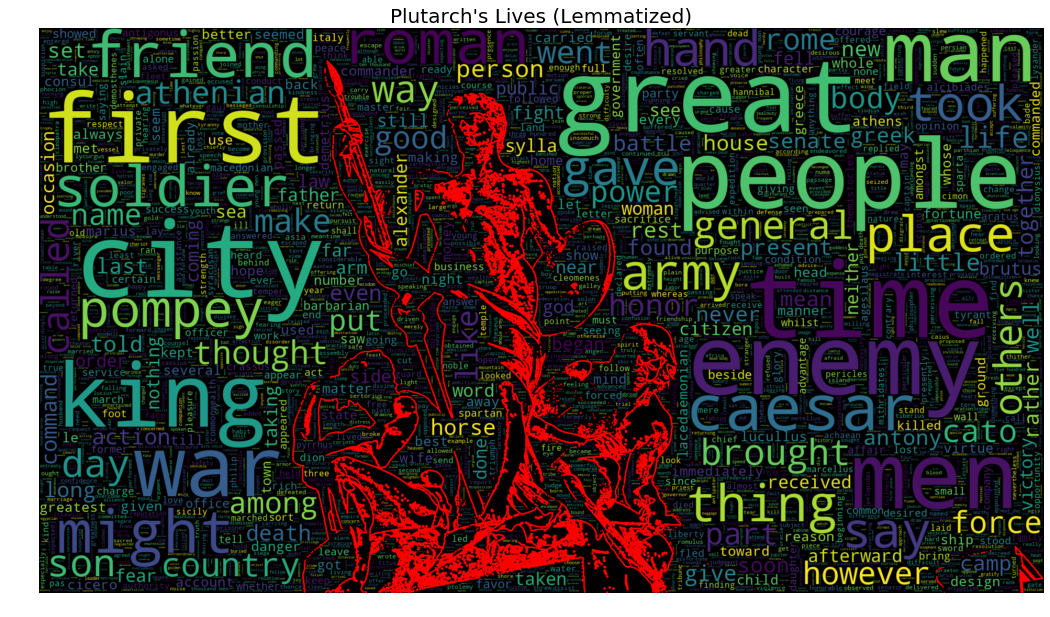

In [23]:
roman_mask = np.array(Image.open(path.join(d, 'roman8.png')))
text_lemma = open(fpath + '/Plutarch_lemma.txt', 'rt').read()

wc = WordCloud(stopwords=stop_words, 
               max_font_size=200,
               width=5000,
               height=4000,
               background_color="black", 
               max_words=4000, 
               mask=roman_mask,
               contour_width=3, 
               contour_color='red',
               random_state = 64).generate(text_lemma)

wc.to_file(path.join(d, "wc_lemmed.png")) #comment out if no need to store the png

fig = plt.figure().set_size_inches(18, 18)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Plutarch's Lives (Lemmatized)", fontsize= 20)
plt.show()